<a href="https://colab.research.google.com/github/TobyM27/IF4012/blob/main/PCD_minggu3_121140157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mingggu 3 Pengolahan Citra Digital

Mounted at /content/drive


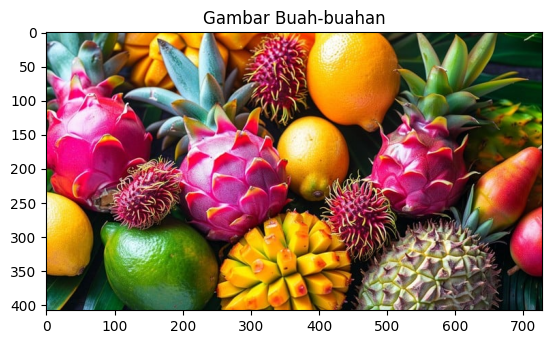

In [ ]:
#Menghubungkan google colab dengan drive agar dataset tersimpan secara permanen
from google.colab import drive
drive.mount('/content/drive')

# Mengimport library yang diperlukan
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Akses file citra
image_path = "/content/drive/MyDrive/Pengolahan Citra Digital/data/fruits.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar berwarna (RGB
plt.imshow(image)
plt.title("Gambar Buah-buahan")
plt.show()


## **1. Operasi Aras Titik** : Mengubah Gambar ke dalam Bentuk Grayscale

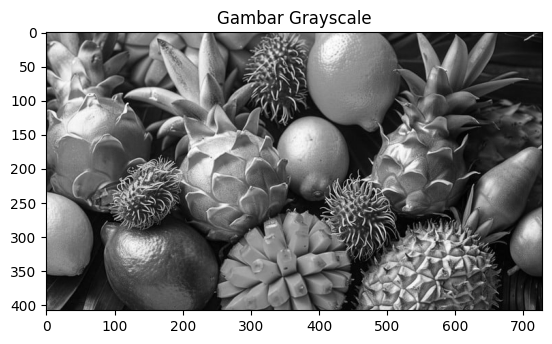

In [ ]:
# Mendapatkan dimensi gambar
height, width, channels = image.shape

# Membuat array kosong untuk menyimpan gambar grayscale
gray_image = np.zeros((height, width), dtype=np.uint8)

# Mengubah gambar menjadi grayscale
for i in range(height):
  for j in range(width):
    # Menghitung rata-rata nilai RGB
    gray_value = np.mean(image[i, j])
    gray_image[i, j] = gray_value

# Menampilkan gambar grayscale
plt.imshow(gray_image, cmap='gray')
plt.title("Gambar Grayscale")
plt.show()


## **2. Operasi Aras Titik** : Mengubah Hasil Grayscale  dalam Bentuk Biner (Tresholding)

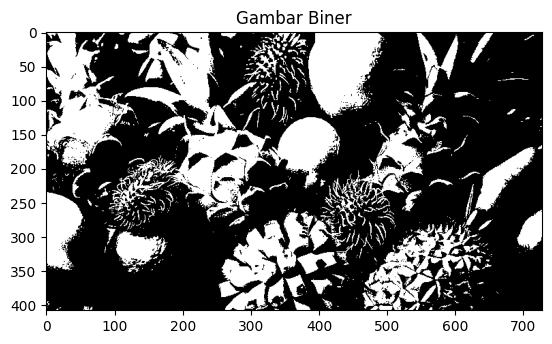

In [ ]:
# Nilai ambang
threshold_value = 128

# Mendapatkan dimensi gambar
height, width = gray_image.shape
binary_image = np.zeros((height, width), dtype=np.uint8)

# Mengubah gambar menjadi biner
for i in range(height):
  for j in range(width):
    if gray_image[i, j] < threshold_value:
      binary_image[i, j] = 0
    else:
      binary_image[i, j] = 1

# Menampilkan gambar biner
plt.imshow(binary_image, cmap='gray')
plt.title("Gambar Biner")
plt.show()


## **3. Operasi Aras Titik** : Mengubah Hasil Grayscale ke dalam Bentuk Negatif

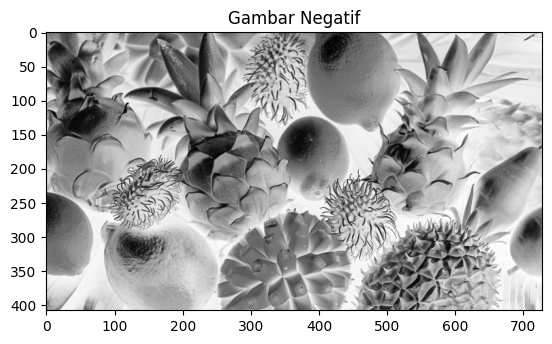

In [ ]:
# Mendapatkan dimensi gambar
height, width = gray_image.shape

# Membuat array kosong untuk menyimpan gambar negatif
negative_image = np.zeros((height, width), dtype=np.uint8)

# Mengubah gambar menjadi negatif
for i in range(height):
  for j in range(width):
    negative_image[i, j] = 255 - gray_image[i, j]

# Menampilkan gambar negatif
plt.imshow(negative_image, cmap='gray')
plt.title("Gambar Negatif")
plt.show()

## **4. Operasi Aras Titik** : Pencerahan (image brightening)

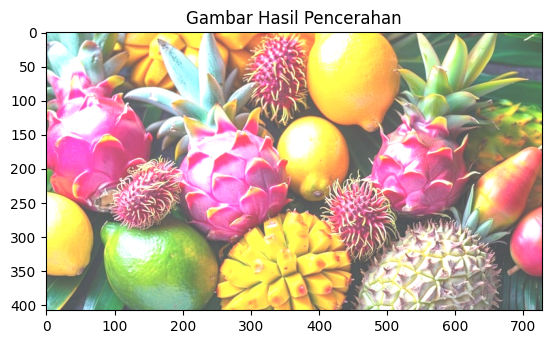

In [ ]:
# Mendapatkan dimensi gambar
height, width, channels = image.shape

# Membuat array kosong untuk menyimpan gambar tercerahkan
brightened_image = np.zeros((height, width, channels), dtype=np.uint8)

# Nilai pencerahan
brightness_value = 80

# Mencerahkan gambar
for i in range(height):
  for j in range(width):
    for k in range(channels):
        temp = image[i][j][k] + brightness_value
        if temp < 0:
            brightened_image[i][j][k] = 0
        elif temp > 255:
            brightened_image[i][j][k] = 255
        else:
            brightened_image[i][j][k] = temp

# Menampilkan gambar hasil pencerahan
plt.imshow(brightened_image, cmap='gray')
plt.title("Gambar Hasil Pencerahan")
plt.show()

## **5. Operasi Aritmatika** : Penjumlahan antar 2 Citra
- Gambar yang digunakan yaitu:
  - Gambar 1 : 500x500 px, warna merah
  - Gambar 2 : 500x500 px, warna biru


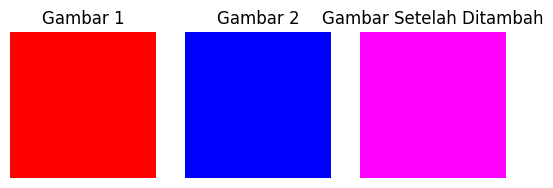

In [ ]:
# Akses file citra
red_image_path = "/content/drive/MyDrive/Pengolahan Citra Digital/data/red_image.jpg"
red_image = cv2.imread(red_image_path)
red_image = cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB)

blue_image_path = "/content/drive/MyDrive/Pengolahan Citra Digital/data/blue_image.jpg"
blue_image = cv2.imread(blue_image_path)
blue_image = cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB)

# Mendapatkan dimensi gambar
height, width, _ = red_image.shape

# Membuat array kosong untuk menyimpan hasil penjumlahan
added_image = np.zeros((height, width, 3), dtype=np.uint8)

# Melakukan penjumlahan piksel per piksel
for i in range(height):
  for j in range(width):
    temp = red_image[i, j] + blue_image[i, j]
    added_image[i, j] = np.minimum(temp, 255)

# Menampilkan gambar
fig, axes = plt.subplots(1, 3)
axes[0].imshow(red_image)
axes[0].set_title("Gambar 1")
axes[0].axis('off')
axes[1].imshow(blue_image)
axes[1].set_title("Gambar 2")
axes[1].axis('off')
axes[2].imshow(added_image)
axes[2].set_title("Gambar Setelah Ditambah")
axes[2].axis('off')
plt.show()

## **6. Operasi Aritmatika** : Pengurangan antar 2 Citra

- Gambar yang digunakan yaitu:
  - Gambar : 1 500x500 px, warna ungu (hasil proses sebelumnya)
  - Gambar : 2 500x500 px, warna merah

> Tambahkan blockquote



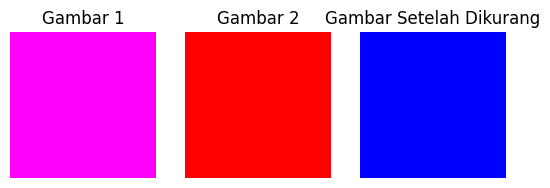

In [ ]:
# Mendapatkan dimensi gambar
height, width, _ = added_image.shape

# Membuat array kosong untuk menyimpan hasil pengurangan
minus_image = np.zeros((height, width, 3), dtype=np.uint8)

# Melakukan pengurangan piksel per piksel
for i in range(height):
  for j in range(width):
    temp = added_image[i, j] - red_image[i, j]
    minus_image[i, j] = np.minimum(temp, 255)

# Menampilkan gambar
fig, axes = plt.subplots(1, 3)
axes[0].imshow(added_image)
axes[0].set_title("Gambar 1")
axes[0].axis('off')
axes[1].imshow(red_image)
axes[1].set_title("Gambar 2")
axes[1].axis('off')
axes[2].imshow(minus_image)
axes[2].set_title("Gambar Setelah Dikurang")
axes[2].axis('off')
plt.show()

## **7. Operasi Aritmatika** : Perkalian antar 2 Citra

- Gambar yang digunakan yaitu:
  - Gambar : 1 500x500 px, warna merah
  - Gambar : 2 500x500 px, warna biru


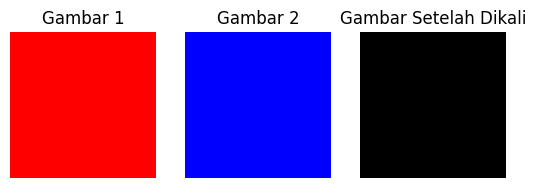

In [ ]:

# Mendapatkan dimensi gambar
height, width, _ = red_image.shape

# Membuat array kosong untuk menyimpan hasil perkalian
multiplied_image = np.zeros((height, width, 3), dtype=np.uint8)

# Melakukan perkalian piksel per piksel
for i in range(height):
  for j in range(width):
    temp = red_image[i, j] * blue_image[i, j]
    multiplied_image[i, j] = np.minimum(temp, 255)

# Menampilkan gambar
fig, axes = plt.subplots(1, 3)
axes[0].imshow(red_image)
axes[0].set_title("Gambar 1")
axes[0].axis('off')
axes[1].imshow(blue_image)
axes[1].set_title("Gambar 2")
axes[1].axis('off')
axes[2].imshow(multiplied_image)
axes[2].set_title("Gambar Setelah Dikali")
axes[2].axis('off')
plt.show()


## **8. Operasi Boolean** : AND



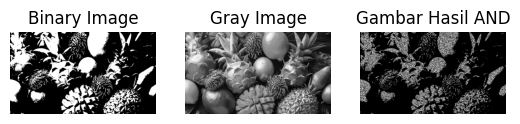

In [ ]:
# Mendapatkan dimensi gambar
height, width = binary_image.shape

# Membuat array kosong untuk menyimpan hasil AND
and_image = np.zeros((height, width), dtype=np.uint8)

# Melakukan operasi boolean AND
for i in range(height):
  for j in range(width):
    and_image[i, j] = binary_image[i, j] & gray_image[i, j]

# Menampilkan gambar hasil AND
fig, axes = plt.subplots(1, 3)
axes[0].imshow(binary_image, cmap="gray")
axes[0].set_title("Binary Image")
axes[0].axis('off')
axes[1].imshow(gray_image, cmap="gray")
axes[1].set_title("Gray Image")
axes[1].axis('off')
axes[2].imshow(and_image, cmap="gray")
axes[2].set_title("Gambar Hasil AND")
axes[2].axis('off')
plt.show()


## **9. Operasi Boolean** : OR

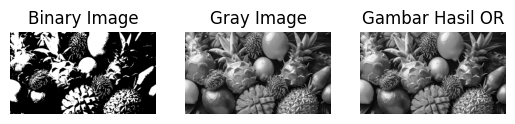

In [ ]:
# Mendapatkan dimensi gambar
height, width = binary_image.shape

# Membuat array kosong untuk menyimpan hasil OR
or_image = np.zeros((height, width), dtype=np.uint8)

# Melakukan operasi boolean OR
for i in range(height):
  for j in range(width):
    or_image[i, j] = binary_image[i, j] | gray_image[i, j]

# Menampilkan gambar hasil OR
fig, axes = plt.subplots(1, 3)
axes[0].imshow(binary_image, cmap="gray")
axes[0].set_title("Binary Image")
axes[0].axis('off')
axes[1].imshow(gray_image, cmap="gray")
axes[1].set_title("Gray Image")
axes[1].axis('off')
axes[2].imshow(or_image, cmap="gray")
axes[2].set_title("Gambar Hasil OR")
axes[2].axis('off')
plt.show()


## **10. Operasi Boolean** : NOT

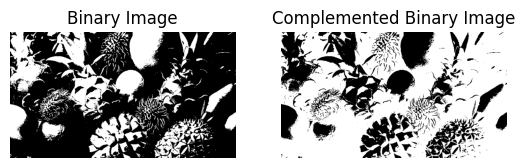

In [ ]:
# Mendapatkan dimensi gambar
height, width, = binary_image.shape

# Membuat array kosong untuk menyimpan hasil
complemented_image = np.zeros((height, width), dtype=np.uint8)

# Melakukan operasi boolean NOT
for i in range(height):
  for j in range(width):
    complemented_image[i, j] = 1 - binary_image[i, j]

# Menampilkan gambar
fig, axes = plt.subplots(1, 2)
axes[0].imshow(binary_image, cmap="gray")
axes[0].set_title("Binary Image")
axes[0].axis('off')
axes[1].imshow(complemented_image, cmap="gray")
axes[1].set_title("Complemented Binary Image")
axes[1].axis('off')
plt.show()

## **11. Operasi Boolean** : XOR

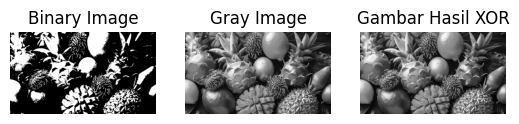

In [ ]:
# Mendapatkan dimensi gambar
height, width = binary_image.shape

# Membuat array kosong untuk menyimpan hasil XOR
xor_image = np.zeros((height, width), dtype=np.uint8)

# Melakukan operasi boolean XOR
for i in range(height):
  for j in range(width):
    xor_image[i, j] = binary_image[i, j] ^ gray_image[i, j]

# Menampilkan gambar hasil XOR
fig, axes = plt.subplots(1, 3)
axes[0].imshow(binary_image, cmap="gray")
axes[0].set_title("Binary Image")
axes[0].axis('off')
axes[1].imshow(gray_image, cmap="gray")
axes[1].set_title("Gray Image")
axes[1].axis('off')
axes[2].imshow(xor_image, cmap="gray")
axes[2].set_title("Gambar Hasil XOR")
axes[2].axis('off')
plt.show()
